In [1]:
import os
import os.path as p

import librosa
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from python_speech_features import mfcc, logfbank

from utils import play_wave

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
audio_data = pd.read_csv('instruments.csv')

data_dir = r'../../data/freesound-audio-tagging/audio_train'

# Calculate features for random recording for each instrument and plot them

* The raw signal after the noise filtering 
* Fast Fourier Transform
* Filter Banks
* Mel-Frequency Cepstral Coefficients 

In [3]:
def calculate_fft(signal, sample_rate):
    signal_size = len(signal)
    frequency = np.fft.rfftfreq(signal_size, 1./sample_rate)
    magnitute = np.abs(np.fft.rfft(signal) / signal_size)
    return magnitute, frequency

def plot_signal_features(instrument, signal, sample_rate):
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    
    # signal
    ax[0, 0].plot(signal)
    ax[0, 0].set_title("Raw signal in time")
    ax[0, 0].set_xlim(0)
    ax[0, 0].set_ylim(-1, 1)
    
    # fft
    magnitute, frequency = calculate_fft(signal, sample_rate)
    ax[0, 1].plot(frequency, magnitute)
    ax[0, 1].set_title("Spectogram")
    ax[0, 1].set_xlim(0, 5000) # Remove higher freqs
    ax[0, 1].set_ylim(0)
    
    # filter bank - plot only the first 2 second
    ax[1, 0].imshow(logfbank(signal[:sample_rate*2], sample_rate, nfilt=26, nfft=1103).T, 
                    cmap='hot', interpolation='nearest')
    ax[1, 0].set_title("Filter Bank Coefficients") 
    
    # mfcc - plot only the first 2 second
    ax[1, 1].imshow(mfcc(signal[:sample_rate*2], sample_rate, numcep=13, nfilt=26, nfft=1103).T, 
                    cmap='hot', interpolation='nearest')
    ax[1, 1].set_title("Mel Coefficients") 
    
    plt.suptitle(f'{instrument.lower()}')
    plt.show()

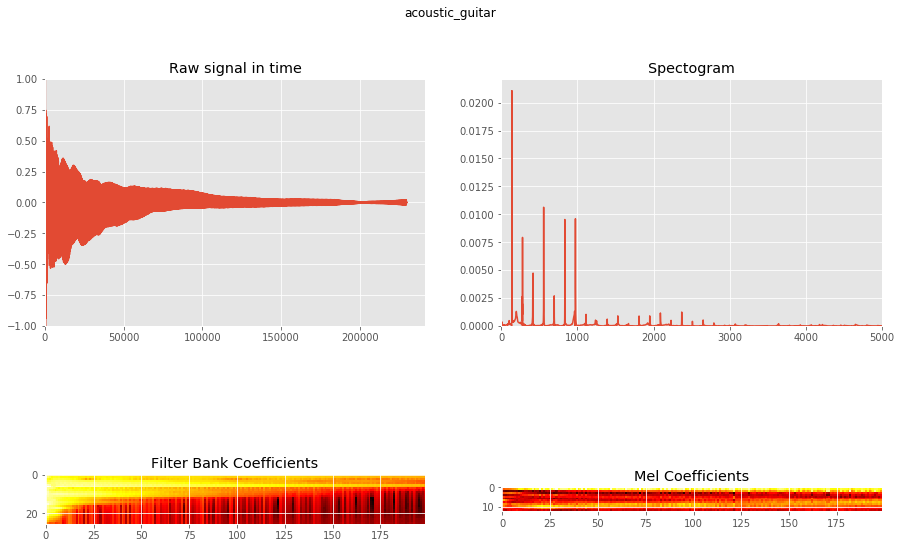

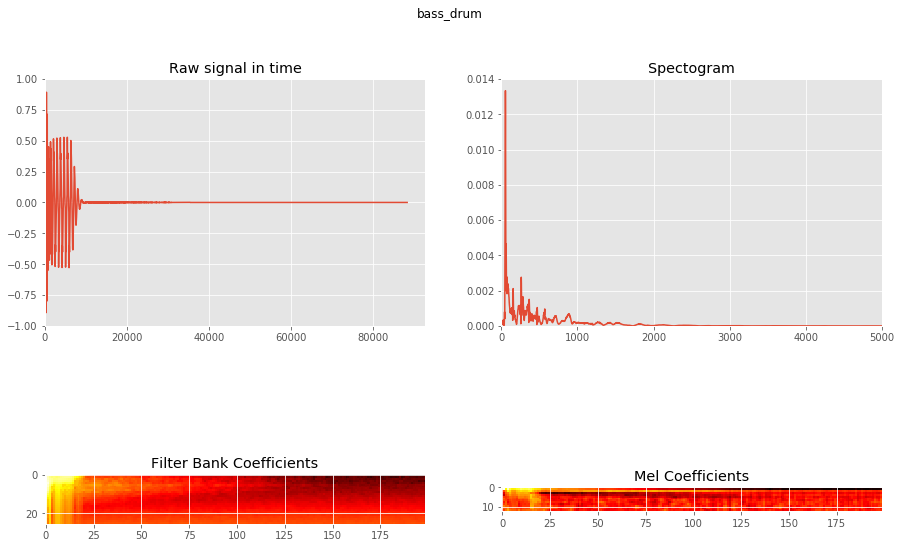

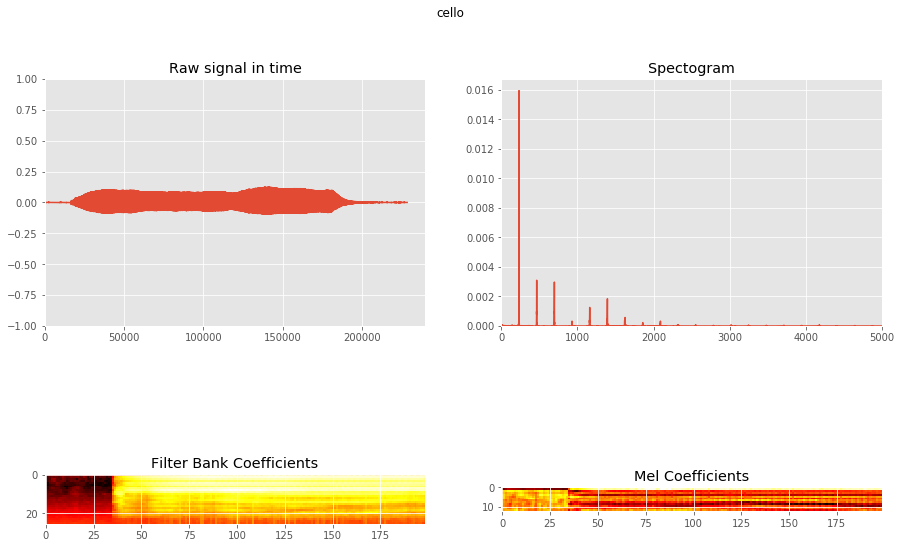

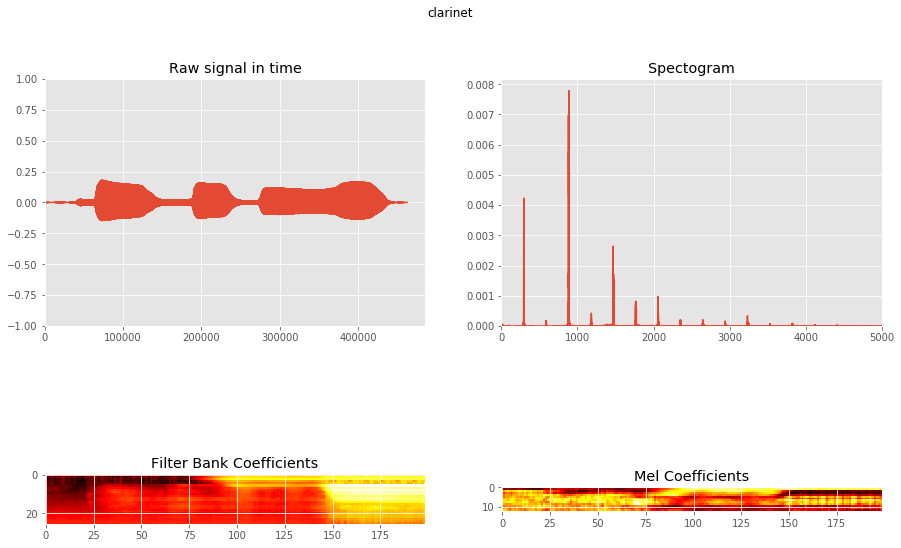

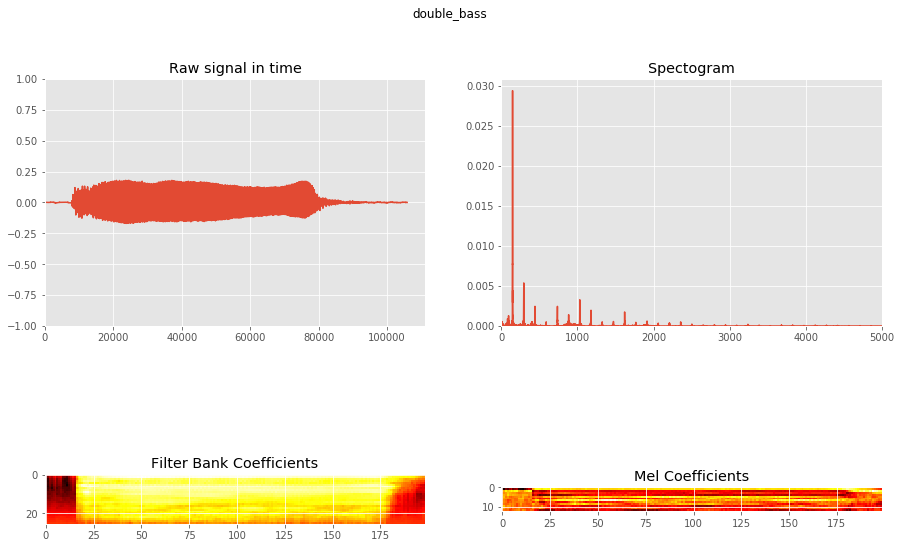

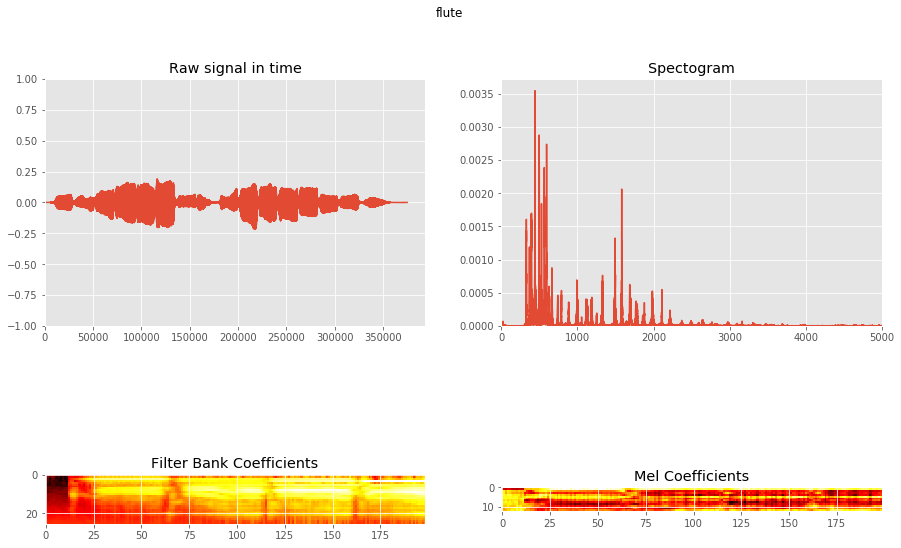

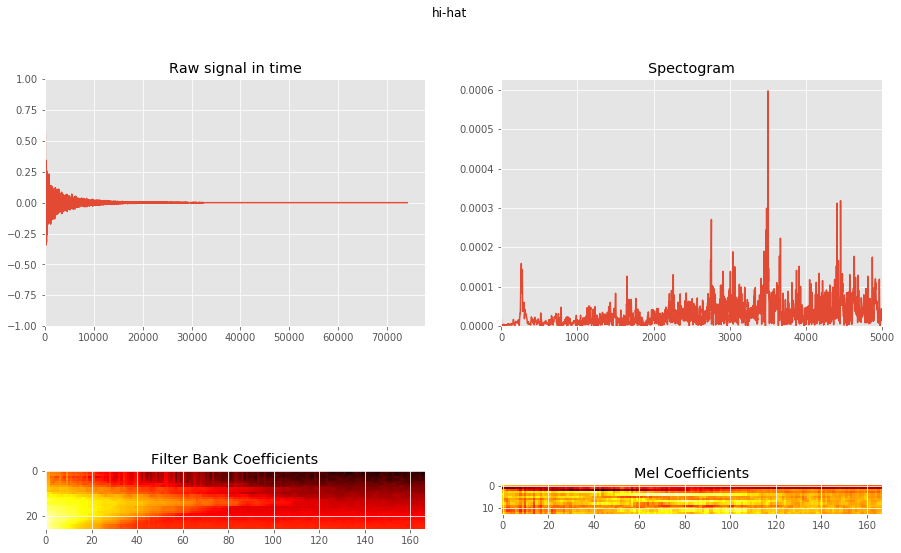

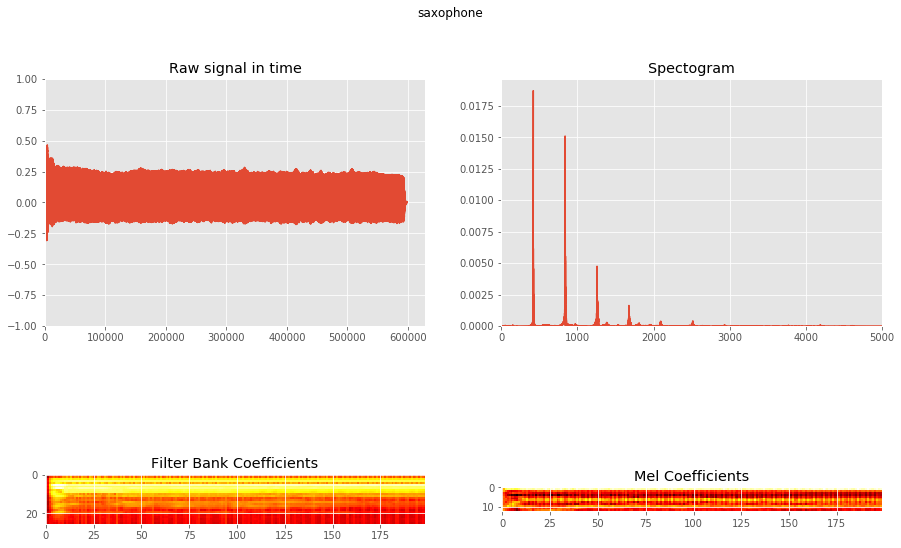

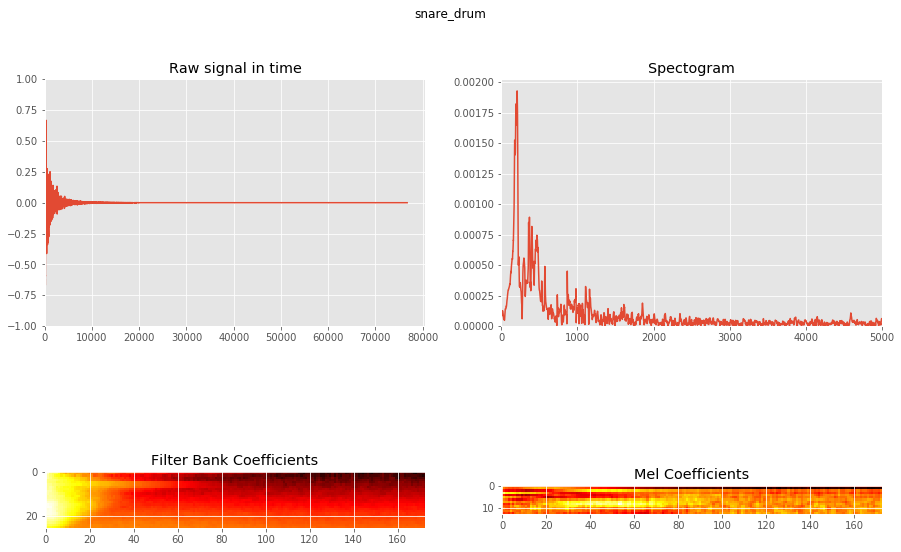

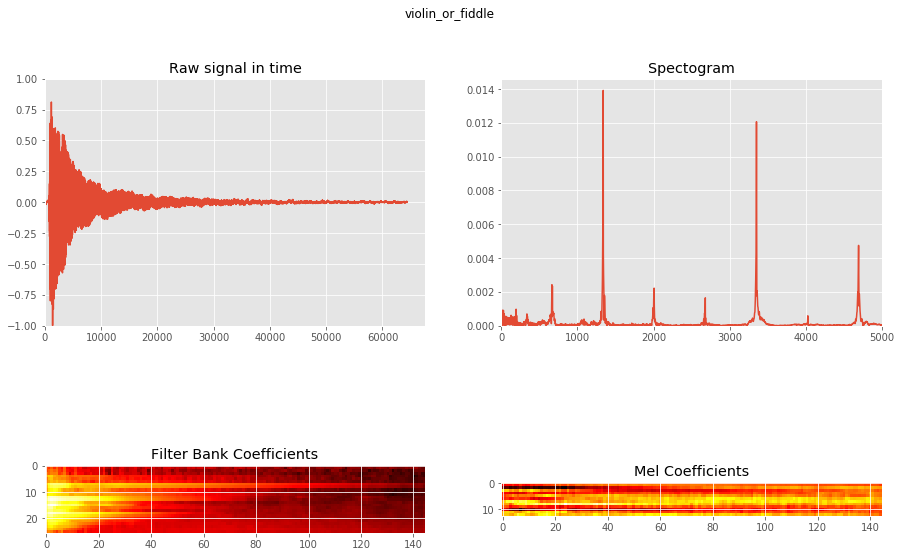

In [4]:
for instrument in np.unique(audio_data.label):
    audio_file = audio_data[audio_data.label == instrument].sample(1).fname.values[0]
    signal, rate = librosa.load(p.join(data_dir, audio_file), sr=None)
    plot_signal_features(instrument, signal, rate)